In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

**LOADING THE DATASET**

In [3]:
diabetes=pd.read_csv(r"E:\MACHINE LEARNING PROJECTS\DISEASE PREDICTIONS\DIABETES PREDICTION\diabetes.csv")

**Top 5 rows**

In [5]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Last 5 rows**

In [7]:
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


**Number of rows and columns**

In [9]:
diabetes.shape

(768, 9)

**Informations about the dataset**

In [11]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Statistical info**

In [13]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Checking if there is any null values**

In [15]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Our dataset contain no null values,we can use it directly**

**Fields of the datasets**

In [18]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

**HERE ,OUTCOME REPRESENTS WHETHER THE PERSON HAVE DIABETES OR NOT**

In [20]:
diabetes['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0-> Healthy patient
1->Diabetes patient

<Axes: xlabel='Outcome'>

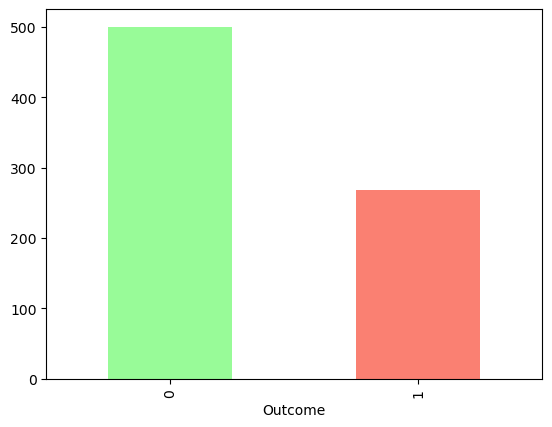

In [22]:
diabetes['Outcome'].value_counts().plot(kind='bar',color=['palegreen','salmon'])

In [23]:
diabetes.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


**SCATTER PLOT BETWEEN GLUCOSE LEVEL AND OUTCOME**

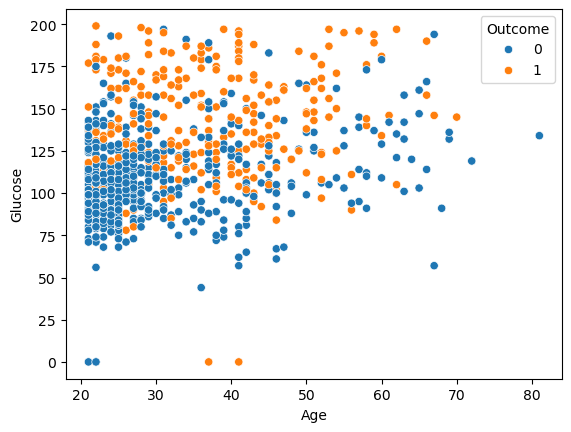

In [25]:
sns.scatterplot(x= "Age" ,y= "Glucose",
              hue="Outcome",
              data=diabetes);


In [26]:
#Correlation between the outcome and other fields
diabetes.corr()['Outcome'].abs().sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

<Axes: >

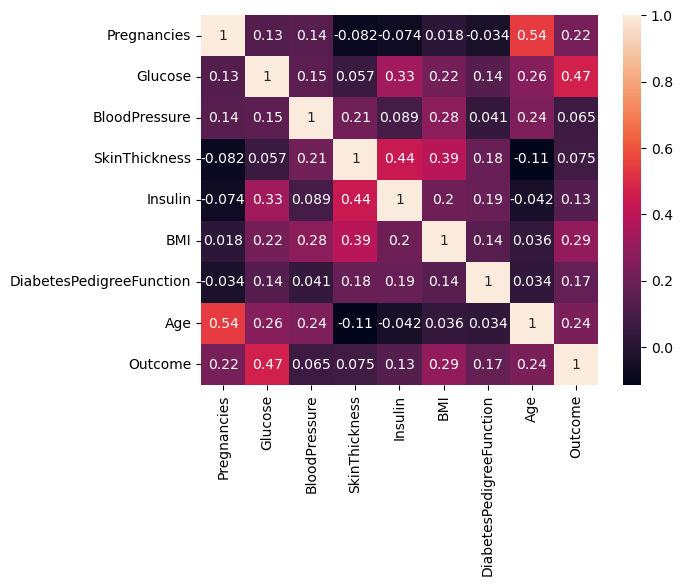

In [27]:
sns.heatmap(diabetes.corr(),annot=True)

**SPLITTING THE DATASETS**


In [29]:
X=diabetes.drop(columns='Outcome',axis=1)
y=diabetes['Outcome']

In [30]:
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y,random_state=2)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 8)
(192, 8)
(576,)
(192,)



**MODEL CREATION**

**SUPPORT VECTOR MACHINE**

In [35]:
model_svm=svm.SVC(kernel='linear')

In [36]:
model_svm

SVC(kernel='linear')

In [37]:
#Training the data
model_svm.fit(X_train,y_train)

SVC(kernel='linear')

In [38]:
svm_predictions=model_svm.predict(X_test)
print(svm_predictions)

[0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1
 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1
 0 0 1 0 1 0 0]


**ACCURACY**

In [40]:
# Training data accuracy
train_predictions = model_svm.predict(X_train)
train_acc = round(accuracy_score(y_train, train_predictions) * 100, 2)
print(f"Accuracy level of the model achieved using SVM on training data is {train_acc} %")

Accuracy level of the model achieved using SVM on training data is 78.47 %


In [41]:
# Testing data accuracy
test_predictions = model_svm.predict(X_test)
test_acc = round(accuracy_score(y_test, test_predictions) * 100, 2)
print(f"Accuracy level of the model achieved using SVM on testing data is {test_acc} %")

Accuracy level of the model achieved using SVM on testing data is 77.08 %


In [42]:
svm_acc = round(accuracy_score(y_test, test_predictions) * 100, 2)
print(f"Accuracy level of the model achieved using SVM is {svm_acc} %")

Accuracy level of the model achieved using SVM is 77.08 %


In [43]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, svm_predictions))

print("\nClassification Report:")
print(classification_report(y_test, svm_predictions))

Confusion Matrix:
[[115  10]
 [ 34  33]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       125
           1       0.77      0.49      0.60        67

    accuracy                           0.77       192
   macro avg       0.77      0.71      0.72       192
weighted avg       0.77      0.77      0.76       192



In [44]:
print("Predicted value =",svm_predictions[100])
print("Actual value =",y_test.values[100])

if(svm_predictions[100] == 1):
    print("The person have diabetes")
else:
    print("The person does not have diabetes")


Predicted value = 0
Actual value = 0
The person does not have diabetes


In [45]:
#cross validation

cv_scores_svm = cross_val_score(model_svm, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores_svm}")
print(f"Mean cross-validation score: {cv_scores_svm.mean() * 100:.2f}%")

Cross-validation scores: [0.75974026 0.75324675 0.74025974 0.81045752 0.76470588]
Mean cross-validation score: 76.57%


**FROM THESE OBSERVATIONS, SVM PERFORMS BETTER THAN OTHER MODELS.SO WE CAN USE SVM MODEL**

**SAVING THE TRAINED MODEL**

In [48]:
import pickle

In [49]:
pickle.dump(model_svm,open("diabetes_model.pkl",'wb'))

In [50]:
loaded_model=pickle.load(open("diabetes_model.pkl",'rb'))

In [51]:
feature_names_trained = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                         'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
sample_input = (5, 130, 70, 25, 50, 28.3, 0.150, 37)
input_array_df = pd.DataFrame([sample_input], columns=feature_names_trained)
sp_diabetes = loaded_model.predict(input_array_df)
print(sp_diabetes[0])

0
